## Cohen Experiment Dataset Analysis using Aequitas
<a id='top_cell'></a>
Following the recommendations of the input data provided by Aequitas Documentation https://dssg.github.io/aequitas/input_data.html on the Notebook (Cohen experiment.ipynb), we generate an experiment using the Cohen dataset and a VGG-19 and create the score and label_value column, on this Notebook we are going to make the other columns categorical and show some results of the Aequitas analysis using the python library.

This Notebook was originally on Colab


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install aequitas
import pandas as pd
import seaborn as sns
from aequitas.group import Group
from aequitas.bias import Bias
from aequitas.fairness import Fairness
import aequitas.plot as ap
import numpy as np
import math

# import warnings; warnings.simplefilter('ignore')

%matplotlib inline

     |████████████████████████████████| 2.2 MB 5.3 MB/s 
     |████████████████████████████████| 45 kB 3.0 MB/s 
     |████████████████████████████████| 161 kB 35.4 MB/s 
     |████████████████████████████████| 456 kB 45.7 MB/s 
     |████████████████████████████████| 727 kB 44.6 MB/s 
     |████████████████████████████████| 97 kB 5.3 MB/s 
     |████████████████████████████████| 83 kB 1.1 MB/s 
     |████████████████████████████████| 596 kB 7.8 MB/s 
     |████████████████████████████████| 80 kB 7.3 MB/s 
     |████████████████████████████████| 2.7 MB 26.5 MB/s 
  Created wheel for Flask-Bootstrap: filename=Flask_Bootstrap-3.3.7.1-py3-none-any.whl size=460123 sha256=3ceafd44b2951e35e423e6cfb5769c2c0c8435829c97e891226eb13b7639b716
  Stored in directory: /root/.cache/pip/wheels/67/a2/d6/50d039c9b59b4caca6d7b53839c8100354a52ab7553d2456eb
  Created wheel for markdown2: filename=markdown2-2.3.5-py3-none-any.whl size=33327 sha256=e7b50ae9bdc28b10f3a840192f5a0e6d84a568d3a531f80e0e38d14d972ca

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Bias Covid/df_pred1.csv")
df.head()

,score,label_value,age,sex,went_icu,location,date
0,0,0,65.0,M,N,Vietnam,2020
1,0,0,65.0,M,N,Vietnam,2020
2,0,0,65.0,M,N,Vietnam,2020
3,0,0,65.0,M,N,Vietnam,2020
4,0,0,52.0,F,N,Taiwan,2020


In [4]:
df.shape

(866, 7)

Categorical Visualizations often support only 5 or 6 classes, so the age, location, and date columns were grouped in different categories for the location we grouped by continent on the date we group from 2000 to 2019, then 2019 and 2020 in separate groups because there are more images only of these two years. Finally, age was grouped into five groups that are equal partitions between the minimum age and the maximum age of the system and a class for not found.

In [5]:
df['location']=df['location'].replace('Germany','Europe')
df['location']=df['location'].replace('Italy','Europe')
df['location']=df['location'].replace('Australia','Oceania')
df['location']=df['location'].replace('Spain','Europe')
df['location']=df['location'].replace('Kingdom','Europe')
df['location']=df['location'].replace('China','Asia')
df['location']=df['location'].replace('States','America')
df['location']=df['location'].replace('Canada','America')
df['location']=df['location'].replace('Egypt','Africa')
df['location']=df['location'].replace('Kong','Asia')
df['location']=df['location'].replace('Pakistan','Asia')
df['location']=df['location'].replace('Taiwan','Asia')
df['location']=df['location'].replace('Arabia','Asia')
df['location']=df['location'].replace('Japan','Asia')
df['location']=df['location'].replace('Iran','Asia')
df['location']=df['location'].replace('Portugal','Europe')
df['location']=df['location'].replace('Hungary','Europe')
df['location']=df['location'].replace('Korea','Asia')
df['location']=df['location'].replace('Malta','Europe')
df['location']=df['location'].replace('Vietnam','Asia')
df['location']=df['location'].replace('Austria','Europe')
df['location']=df['location'].replace('Israel','Asia')
df['location']=df['location'].replace('Thailand','Asia')
df['location']=df['location'].replace('Singapore','Asia')
df['location']=df['location'].replace('Greece','Europe')
df['location']=df['location'].replace('Turkey','Europe')
df['location']=df['location'].replace('Russia','Asia')
df['location']=df['location'].replace('Belgium','Europe')
df['location']=df['location'].replace('Qatar','Asia')
df['location']=df['location'].replace('Jordan','Asia')
df['location']=df['location'].replace('Guatemala','America')
df['location']=df['location'].replace('Brazil','America')
df['location']=df['location'].replace('Sweden','Europe')
df['location']=df['location'].replace('Afghanistan','Asia')
df['location']=df['location'].replace('Zealand','Oceania')
df['location']=df['location'].replace('Argentina','America')
df['location']=df['location'].replace('Colombia','America')
df['location']=df['location'].replace('Philippines','Asia')
df['location']=df['location'].replace('Denmark','Europe')
df['location']=df['location'].replace('Malaysia','Asia')

In [6]:
df['location'].value_counts()

Europe     495
Asia       155
Oceania     85
America     61
Africa      14
Name: location, dtype: int64

In [7]:
df['date']=df['date'].str.split("/").str[-1]
df['date']=df['date'].replace('13','2013')
df['date']=df['date'].replace('19','2019')
df['date']=df['date'].replace('12','2012')
df['date']=df['date'].replace('20','2020')

In [8]:
df['date']=df['date'].astype(float)
values = [2000,2019,2020]
interval = []
for i in df['date'].values:
  if math.isnan(i):
    interval.append('Not found')
  else:
    for j in range(len(values)):
      if values[j] != max(values):
        if i>= values[j] and i< values[j+1]:
          interval.append(str(values[j]) + ' - ' + str(values[j+1]))
      else:
        if i== values[j]:
          interval.append(str(values[j]))
df['date']=interval

In [9]:
df['date'].value_counts()

2020           502
Not found      249
2000 - 2019    106
2019 - 2020      9
Name: date, dtype: int64

In [10]:
values = np.round(np.linspace(df['age'].min()-1,df['age'].max()+1,5))
interval = []
for i in df['age'].values:
  if math.isnan(i):
    interval.append('Not found')
  else:
    for j in range(len(values)):
      if values[j] != max(values):
        if i>= values[j] and i< values[j+1]:
          interval.append(str(values[j]) + ' - ' + str(values[j+1]))
      else:
        if i>= values[j]:
          interval.append('More than ' + str(values[j]))
df['age']=interval

In [11]:
df['age'].value_counts()

56.0 - 76.0    239
Not found      230
36.0 - 56.0    221
17.0 - 36.0    121
76.0 - 95.0     55
Name: age, dtype: int64

In [12]:
df.to_csv('/content/drive/MyDrive/Bias Covid/df_cor_1.csv')

## Pre-Aequitas: Exploring the Dataset

On the bars below, we see the distribution of the predicted values of each column 

In [13]:
aq_palette = sns.diverging_palette(225, 35, n=2)

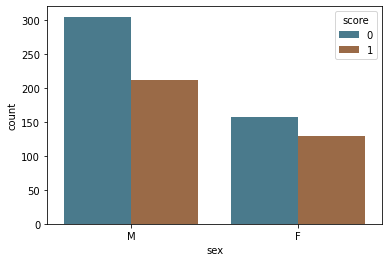

In [14]:
by_sex = sns.countplot(x="sex", hue="score", data=df, palette=aq_palette)

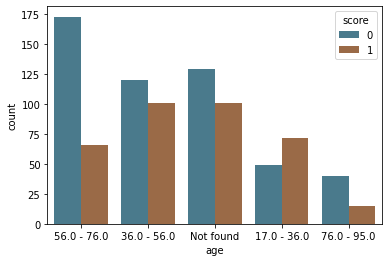

In [15]:
by_age = sns.countplot(x="age", hue="score", data=df, palette=aq_palette)

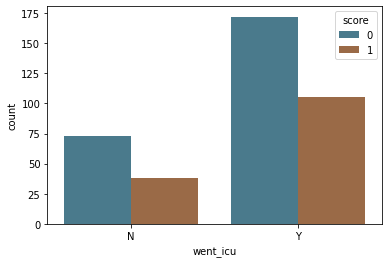

In [16]:
by_icu = sns.countplot(x="went_icu", hue="score", data=df, palette=aq_palette)

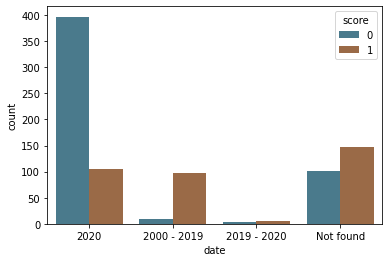

In [17]:
by_date = sns.countplot(x="date", hue="score", data=df, palette=aq_palette)

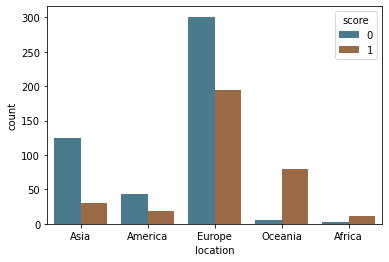

In [18]:
by_loc = sns.countplot(x="location", hue="score", data=df, palette=aq_palette)

__Bar charts of label_value column__

Then we found the distribution of the actual values below, and as is seen because of the high accuracy of the dataset, the distribution is similar. Still, if the accuracy was low, the distribution might change.



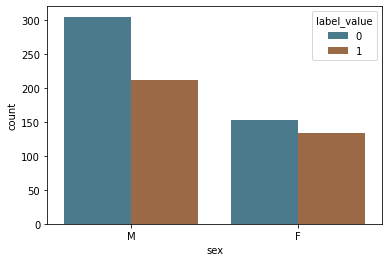

In [19]:
label_by_age = sns.countplot(x="sex", hue="label_value", data=df, palette=aq_palette)

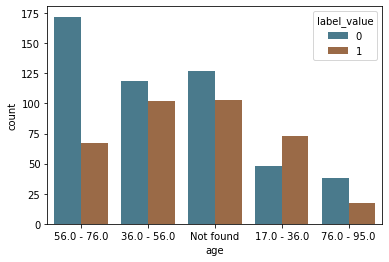

In [20]:
label_by_sex = sns.countplot(x="age", hue="label_value", data=df, palette=aq_palette)

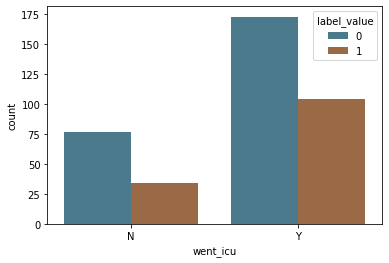

In [21]:
label_by_icu = sns.countplot(x="went_icu", hue="label_value", data=df, palette=aq_palette)

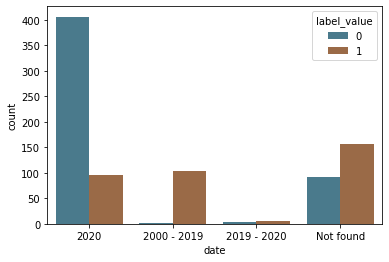

In [22]:
label_by_date = sns.countplot(x="date", hue="label_value", data=df, palette=aq_palette)

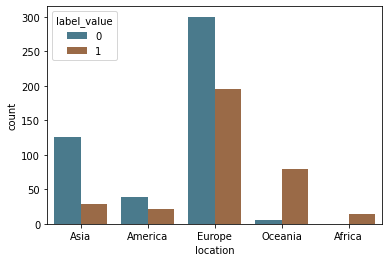

In [23]:
label_by_loc = sns.countplot(x="location", hue="label_value", data=df, palette=aq_palette)

## Putting Aequitas toLodfsfsfWith Aequitas, we provide a tool that automates the reporting of various fairness metrics to aid in this process.

Applying Aequitas progammatically is a three step process represented by three python classes: 

`Group()`: Define groups 

`Bias()`: Calculate disparities

`Fairness()`: Assert fairness

Each class builds on the previous one expanding the output DataFrame.


### Data Formatting

Data for this example was preprocessed for compatibility with Aequitas. **The Aequitas tool always requires a `score` column and requires a binary `label_value` column for supervised metrics**, (i.e., False Discovery Rate, False Positive Rate, False Omission Rate, and False Negative Rate).

Preprocessing includes but is not limited to checking for mandatory `score` and `label_value` columns as well as at least one column representing attributes specific to the data set. See [documentation](../input_data.html) for more information about input data.

Note that while `entity_id` is not necessary for this example, Aequitas recognizes `entity_id` as a reserve column name and will not recognize it as an attribute column.

<a id='xtab'></a>

### What is the distribution of groups, predicted scores, and labels across my dataset?

Aequitas's `Group()` class enables researchers to evaluate biases across all subgroups in their dataset by assembling a confusion matrix of each subgroup, calculating commonly used metrics such as false positive rate and false omission rate, as well as counts by group and group prevelance among the sample population. 

<a id='counts_description'></a>
The **`get_crosstabs()`** method tabulates a confusion matrix for each subgroup and calculates commonly used metrics such as false positive rate and false omission rate. It also provides counts by group and group prevelances.

#### Group Counts Calculated:

| Count Type | Column Name |
| --- | --- |
| False Positive Count | 'fp' |
| False Negative Count | 'fn' |
| True Negative Count | 'tn' |
| True Positive Count | 'tp' |
| Predicted Positive Count | 'pp' |
| Predicted Negative Count | 'pn' |
| Count of Negative Labels in Group | 'group_label_neg' |
| Count of Positive Labels in Group | 'group_label_pos' | 
| Group Size | 'group_size'|
| Total Entities | 'total_entities' |

#### Absolute Metrics Calculated:

| Metric | Column Name |
| --- | --- |
| True Positive Rate | 'tpr' |
| True Negative Rate | 'tnr' |
| False Omission Rate | 'for' |
| False Discovery Rate | 'fdr' |
| False Positive Rate | 'fpr' |
| False Negative Rate | 'fnr' |
| Negative Predictive Value | 'npv' |
| Precision | 'precision' |
| Predicted Positive Ratio$_k$ | 'ppr' |
| Predicted Positive Ratio$_g$ | 'pprev' |
| Group Prevalence | 'prev' |


**Note**: The **`get_crosstabs()`** method expects a dataframe with predefined columns `score`, and `label_value` and treats other columns (with a few exceptions) as attributes against which to test for disparities. In this case, we include `location`, `sex` , `date`, `went_icu`, and `age`. 

In [24]:
g = Group()
xtab, _ = g.get_crosstabs(df)


### What are bias metrics across groups?

Once you have run the `Group()` class **`get_crosstabs()`** method, you'll have a dataframe of the [group counts](#counts_description) and [group value bias metrics](#counts_description).

The `Group()` class has a **`list_absolute_metrics()`** method, which you can use for faster slicing to view just  counts or bias metrics.

In [25]:
absolute_metrics = g.list_absolute_metrics(xtab)

#### View calculated counts across sample population groups

In [26]:
xtab[[col for col in xtab.columns if col not in absolute_metrics]]

,model_id,score_threshold,k,attribute_name,attribute_value,pp,pn,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities
0,0,binary 0/1,355,age,17.0 - 36.0,72,49,2,3,46,70,73,48,121,866
1,0,binary 0/1,355,age,36.0 - 56.0,101,120,3,4,116,98,102,119,221,866
2,0,binary 0/1,355,age,56.0 - 76.0,66,173,4,5,168,62,67,172,239,866
3,0,binary 0/1,355,age,76.0 - 95.0,15,40,2,4,36,13,17,38,55,866
4,0,binary 0/1,355,age,Not found,101,129,2,4,125,99,103,127,230,866
5,0,binary 0/1,355,sex,F,129,157,6,10,147,123,133,153,286,866
6,0,binary 0/1,355,sex,M,212,305,7,7,298,205,212,305,517,866
7,0,binary 0/1,355,went_icu,N,38,73,4,0,73,34,34,77,111,866
8,0,binary 0/1,355,went_icu,Y,105,172,2,1,171,103,104,173,277,866
9,0,binary 0/1,355,location,Africa,11,3,0,3,0,11,14,0,14,866


#### View calculated absolute metrics for each sample population group

In [27]:
xtab[['attribute_name', 'attribute_value'] + absolute_metrics].round(2)

,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,ppr,pprev,prev
0,age,17.0 - 36.0,0.96,0.96,0.06,0.03,0.04,0.04,0.94,0.97,0.20,0.60,0.60
1,age,36.0 - 56.0,0.96,0.97,0.03,0.03,0.03,0.04,0.97,0.97,0.28,0.46,0.46
2,age,56.0 - 76.0,0.93,0.98,0.03,0.06,0.02,0.07,0.97,0.94,0.19,0.28,0.28
3,age,76.0 - 95.0,0.76,0.95,0.10,0.13,0.05,0.24,0.90,0.87,0.04,0.27,0.31
4,age,Not found,0.96,0.98,0.03,0.02,0.02,0.04,0.97,0.98,0.28,0.44,0.45
5,sex,F,0.92,0.96,0.06,0.05,0.04,0.08,0.94,0.95,0.36,0.45,0.47
6,sex,M,0.97,0.98,0.02,0.03,0.02,0.03,0.98,0.97,0.60,0.41,0.41
7,went_icu,N,1.00,0.95,0.00,0.11,0.05,0.00,1.00,0.89,0.11,0.34,0.31
8,went_icu,Y,0.99,0.99,0.01,0.02,0.01,0.01,0.99,0.98,0.30,0.38,0.38
9,location,Africa,0.79,NaN,1.00,0.00,NaN,0.21,0.00,1.00,0.03,0.79,1.00



## What levels of disparity exist between population groups?

### _Aequitas Bias() Class_
We use the Aequitas `Bias()` class to calculate disparities between groups based on the crosstab returned by the `Group()` class **`get_crosstabs()`** method described above. Disparities are calculated as a ratio of a metric for a group of interest compared to a base group. For example, the False Negative Rate Disparity for black defendants vis-a-vis whites is:
$$Disparity_{FNR} =  \frac{FNR_{black}}{FNR_{white}}$$ 

Below, we use **`get_disparity_predefined_groups()`** which allows us to choose reference groups that clarify the output for the practitioner. 

The Aequitas `Bias()` class includes two additional get disparity functions: **`get_disparity_major_group()`** and **`get_disparity_min_metric()`**, which automate base group selection based on sample majority (across each attribute) and minimum value for each calculated bias metric, respectively.  

The **`get_disparity_predefined_groups()`** allows user to define a base group for each attribute, as illustrated below. 

#### Disparities Calculated Calcuated:

| Metric | Column Name |
| --- | --- |
| True Positive Rate Disparity | 'tpr_disprity' |
| True Negative Rate | 'tnr_disparity' |
| False Omission Rate | 'for_disparity' |
| False Discovery Rate | 'fdr_disparity' |
| False Positive Rate | 'fpr_disparity' |
| False NegativeRate | 'fnr_disparity' |
| Negative Predictive Value | 'npv_disparity' |
| Precision Disparity | 'precision_disparity' |
| Predicted Positive Ratio$_k$ Disparity | 'ppr_disparity' |
| Predicted Positive Ratio$_g$ Disparity | 'pprev_disparity' |


Columns for each disparity are appended to the crosstab dataframe, along with a column indicating the reference group for each calculated metric (denoted by `[METRIC NAME]_ref_group_value`). We see a slice of the dataframe with calculated metrics in the next section.

In [28]:
b = Bias()

#### Disparities calculated in relation to a user-specified group for each attribute

In [29]:
df.head()

,score,label_value,age,sex,went_icu,location,date
0,0.0,0,56.0 - 76.0,M,N,Asia,2020
1,0.0,0,56.0 - 76.0,M,N,Asia,2020
2,0.0,0,56.0 - 76.0,M,N,Asia,2020
3,0.0,0,56.0 - 76.0,M,N,Asia,2020
4,0.0,0,36.0 - 56.0,F,N,Asia,2020


In [30]:
bdf = b.get_disparity_predefined_groups(xtab, original_df=df, 
                                        ref_groups_dict={'sex':'M', 'age':'36.0 - 56.0','went_icu':'Y','date':'2020','location':'Europe'}, 
                                        alpha=0.05, check_significance=True, 
                                        mask_significance=True)
bdf.style

get_disparity_predefined_group()


,model_id,score_threshold,k,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,pp,pn,ppr,pprev,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities,prev,label_value_significance,score_significance,fdr_disparity,fdr_ref_group_value,fdr_significance,fnr_disparity,fnr_ref_group_value,fnr_significance,for_disparity,for_ref_group_value,for_significance,fpr_disparity,fpr_ref_group_value,fpr_significance,npv_disparity,npv_ref_group_value,npv_significance,ppr_disparity,ppr_ref_group_value,ppr_significance,pprev_disparity,pprev_ref_group_value,pprev_significance,precision_disparity,precision_ref_group_value,precision_significance,tnr_disparity,tnr_ref_group_value,tnr_significance,tpr_disparity,tpr_ref_group_value,tpr_significance
0,0,binary 0/1,355,age,17.0 - 36.0,0.958904,0.958333,0.061224,0.027778,0.041667,0.041096,0.938776,0.972222,72,49,0.202817,0.595041,2,3,46,70,73,48,121,866,0.603306,True,True,0.935185,36.0 - 56.0,False,1.047945,36.0 - 56.0,False,1.836735,36.0 - 56.0,False,1.652778,36.0 - 56.0,False,0.971147,36.0 - 56.0,False,0.712871,36.0 - 56.0,True,1.302021,36.0 - 56.0,True,1.001984,36.0 - 56.0,False,0.983118,36.0 - 56.0,False,0.998043,36.0 - 56.0,False
1,0,binary 0/1,355,age,36.0 - 56.0,0.960784,0.974790,0.033333,0.029703,0.025210,0.039216,0.966667,0.970297,101,120,0.284507,0.457014,3,4,116,98,102,119,221,866,0.461538,False,False,1.000000,36.0 - 56.0,False,1.000000,36.0 - 56.0,False,1.000000,36.0 - 56.0,False,1.000000,36.0 - 56.0,False,1.000000,36.0 - 56.0,False,1.000000,36.0 - 56.0,False,1.000000,36.0 - 56.0,False,1.000000,36.0 - 56.0,False,1.000000,36.0 - 56.0,False,1.000000,36.0 - 56.0,False
2,0,binary 0/1,355,age,56.0 - 76.0,0.925373,0.976744,0.028902,0.060606,0.023256,0.074627,0.971098,0.939394,66,173,0.185915,0.276151,4,5,168,62,67,172,239,866,0.280335,True,True,2.040404,36.0 - 56.0,False,1.902985,36.0 - 56.0,False,0.867052,36.0 - 56.0,False,0.922481,36.0 - 56.0,False,1.004584,36.0 - 56.0,False,0.653465,36.0 - 56.0,True,0.604250,36.0 - 56.0,True,0.968151,36.0 - 56.0,False,1.002005,36.0 - 56.0,False,0.963143,36.0 - 56.0,False
3,0,binary 0/1,355,age,76.0 - 95.0,0.764706,0.947368,0.100000,0.133333,0.052632,0.235294,0.900000,0.866667,15,40,0.042254,0.272727,2,4,36,13,17,38,55,866,0.309091,True,True,4.488889,36.0 - 56.0,False,6.000000,36.0 - 56.0,False,3.000000,36.0 - 56.0,False,2.087719,36.0 - 56.0,False,0.931034,36.0 - 56.0,False,0.148515,36.0 - 56.0,True,0.596760,36.0 - 56.0,True,0.893197,36.0 - 56.0,False,0.971869,36.0 - 56.0,False,0.795918,36.0 - 56.0,False
4,0,binary 0/1,355,age,Not found,0.961165,0.984252,0.031008,0.019802,0.015748,0.038835,0.968992,0.980198,101,129,0.284507,0.439130,2,4,125,99,103,127,230,866,0.447826,True,True,0.666667,36.0 - 56.0,True,0.990291,36.0 - 56.0,True,0.930233,36.0 - 56.0,True,0.624672,36.0 - 56.0,True,1.002406,36.0 - 56.0,True,1.000000,36.0 - 56.0,True,0.960870,36.0 - 56.0,True,1.010204,36.0 - 56.0,True,1.009707,36.0 - 56.0,True,1.000396,36.0 - 56.0,True
5,0,binary 0/1,355,sex,F,0.924812,0.960784,0.063694,0.046512,0.039216,0.075188,0.936306,0.953488,129,157,0.363380,0.451049,6,10,147,123,133,153,286,866,0.465035,False,False,1.408638,M,False,2.277121,M,False,2.775250,M,False,1.708683,M,False,0.958299,M,False,0.608491,M,False,1.099964,M,False,0.986047,M,False,0.983353,M,False,0.956391,M,False
6,0,binary 0/1,355,sex,M,0.966981,0.977049,0.022951,0.033019,0.022951,0.033019,0.977049,0.966981,212,305,0.597183,0.410058,7,7,298,205,212,305,517,866,0.410058,False,False,1.000000,M,False,1.000000,M,False,1.000000,M,False,1.000000,M,False,1.000000,M,False,1.000000,M,False,1.000000,M,False,1.000000,M,False,1.000000,M,False,1.000000,M,False
7,0,binary 0/1,355,went_icu,N,1.000000,0.948052,0.000000,0.105263,0.051948,0.000000,1.000000,0.894737,38,73,0.107042,0.342342,4,0,73,34,34,77,111,866,0.306306,False,False,5.526316,Y,False,0.000000,Y,False,0.000000,Y,False,4.493506,Y,False,1.005848,Y,False,0.361905,Y,False,0.903132,Y,False,0.912110,Y,False,0.959140,Y,False,1.009709,

The `Bias()` class includes a method to quickly return a list of calculated disparities from the dataframe returned by the **`get_disparity_`** methods.

In [31]:
# View disparity metrics added to dataframe
bdf[['attribute_name', 'attribute_value'] +
     b.list_disparities(bdf) + b.list_significance(bdf)].style

,attribute_name,attribute_value,fdr_disparity,fnr_disparity,for_disparity,fpr_disparity,npv_disparity,ppr_disparity,pprev_disparity,precision_disparity,tnr_disparity,tpr_disparity,label_value_significance,score_significance,fdr_significance,fnr_significance,for_significance,fpr_significance,npv_significance,ppr_significance,pprev_significance,precision_significance,tnr_significance,tpr_significance
0,age,17.0 - 36.0,0.935185,1.047945,1.836735,1.652778,0.971147,0.712871,1.302021,1.001984,0.983118,0.998043,True,True,False,False,False,False,False,True,True,False,False,False
1,age,36.0 - 56.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,False,False,False,False,False,False,False,False,False,False,False,False
2,age,56.0 - 76.0,2.040404,1.902985,0.867052,0.922481,1.004584,0.653465,0.604250,0.968151,1.002005,0.963143,True,True,False,False,False,False,False,True,True,False,False,False
3,age,76.0 - 95.0,4.488889,6.000000,3.000000,2.087719,0.931034,0.148515,0.596760,0.893197,0.971869,0.795918,True,True,False,False,False,False,False,True,True,False,False,False
4,age,Not found,0.666667,0.990291,0.930233,0.624672,1.002406,1.000000,0.960870,1.010204,1.009707,1.000396,True,True,True,True,True,True,True,True,True,True,True,True
5,sex,F,1.408638,2.277121,2.775250,1.708683,0.958299,0.608491,1.099964,0.986047,0.983353,0.956391,False,False,False,False,False,False,False,False,False,False,False,False
6,sex,M,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,False,False,False,False,False,False,False,False,False,False,False,False
7,went_icu,N,5.526316,0.000000,0.000000,4.493506,1.005848,0.361905,0.903132,0.912110,0.959140,1.009709,False,False,False,False,False,False,False,False,False,False,False,False
8,went_icu,Y,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,False,False,False,False,False,False,False,False,False,False,False,False
9,location,Africa,0.000000,3.482143,25.083333,nan,0.000000,0.056701,2.004786,1.060109,nan,0.837237,True,True,False,True,True,False,True,True,True,False,False,True


Tolerance According to predefined values this could change de results

In [32]:
metrics = ['fpr','fdr']
disparity_tolerance = 1.25

Change 0 with 0.0002 for two reasons, first a cero generate an NaN on visualization so it generates an error and don't plot, then the maximun value of a plot is 5000 and this is a denominator in with the maximun value on the numerator is 1 so the maximun value posible replacing this value is 0.0002

In [33]:
bdf = bdf.replace(0,0.0002)

# Aequitas Visualizations

In [34]:
ap.summary(bdf, metrics, fairness_threshold = disparity_tolerance)

alt.VConcatChart(...)

### Check for disparities in Race

In [35]:
ap.disparity(bdf, metrics, 'went_icu', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

#### Check how the fairness threshold maps to the absolute values of each metric


In [36]:
ap.absolute(bdf, metrics, 'went_icu', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

### Check for disparities in Sex

In [37]:
ap.disparity(bdf, metrics, 'sex', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

#### Check how the fairness threshold maps to the absolute values of each metric


In [38]:
ap.absolute(bdf, metrics, 'sex', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

### Check for disparities in Age Categories

In [39]:
ap.disparity(bdf, metrics, 'age', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

#### Check how the fairness threshold maps to the absolute values of each metric


In [40]:
ap.absolute(bdf, metrics, 'age', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

### Check for disparities in Date Categories

In [41]:
ap.disparity(bdf, metrics, 'date', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

#### Check how the fairness threshold maps to the absolute values of each metric


In [42]:
ap.absolute(bdf, metrics, 'date', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

### Check for disparities in location Categories

In [43]:
ap.disparity(bdf, metrics, 'location', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

#### Check how the fairness threshold maps to the absolute values of each metric


In [44]:
ap.absolute(bdf, metrics, 'location', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)



### How do I interpret calculated disparity ratios?
The calculated disparities from the dataframe returned by the `Bias()` class **`get_disparity_`** methods are in relation to a reference group, which will always have a disparity of 1.0.

The differences in False Positive Rates, noted in the discussion of the `Group()` class above, are clarified using the disparity ratio (`fpr_disparity`).

As seen above, False Discovery Rates have much less disparity (`fdr_disparity`), or fraction of false postives over predicted positive in a group. 



### How does the selected reference group affect disparity calculations?

Disparities calculated in the the Aequitas `Bias()` class based on the crosstab returned by the `Group()` class **`get_crosstabs()`** method can be derived using several different base gorups. In addition to using user-specified groups illustrated above, Aequitas can automate base group selection based on dataset characterisitcs:

In [46]:
hbdf = b.get_disparity_predefined_groups(xtab, original_df=df, 
                                         ref_groups_dict={'sex':'M', 'age':'36.0 - 56.0','went_icu':'Y','date':'2020','location':'Europe'},
                                         alpha=0.05,
                                         check_significance=True,
                                         mask_significance=False, 
                                         selected_significance=['fpr', 'for', 'fdr'])


get_disparity_predefined_group()


In [47]:
# View disparity metrics added to dataframe
hbdf[['attribute_name', 'attribute_value'] +  
     b.list_disparities(hbdf) + b.list_significance(hbdf)]

,attribute_name,attribute_value,fdr_disparity,fnr_disparity,for_disparity,fpr_disparity,npv_disparity,ppr_disparity,pprev_disparity,precision_disparity,tnr_disparity,tpr_disparity,label_value_significance,score_significance,fdr_significance,for_significance,fpr_significance
0,age,17.0 - 36.0,0.935185,1.047945,1.836735,1.652778,0.971147,0.712871,1.302021,1.001984,0.983118,0.998043,1.206389e-02,1.456761e-02,0.941038,4.120204e-01,0.941038
1,age,36.0 - 56.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000
2,age,56.0 - 76.0,2.040404,1.902985,0.867052,0.922481,1.004584,0.653465,0.604250,0.968151,1.002005,0.963143,5.452373e-05,5.406061e-05,0.332874,8.295565e-01,0.332874
3,age,76.0 - 95.0,4.488889,6.000000,3.000000,2.087719,0.931034,0.148515,0.596760,0.893197,0.971869,0.795918,3.530660e-02,9.256960e-03,0.066108,9.498985e-02,0.066108
4,age,Not found,0.666667,0.990291,0.930233,0.624672,1.002406,1.000000,0.960870,1.010204,1.009707,1.000396,7.706219e-01,7.033855e-01,0.652597,9.175970e-01,0.652597
5,sex,F,1.408638,2.277121,2.775250,1.708683,0.958299,0.608491,1.099964,0.986047,0.983353,0.956391,1.321297e-01,2.610091e-01,0.529434,5.772248e-02,0.529434
6,sex,M,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000
7,went_icu,N,5.526316,0.000000,0.000000,4.493506,1.005848,0.361905,0.903132,0.912110,0.959140,1.009709,1.994904e-01,4.993018e-01,0.106027,5.158524e-01,0.106027
8,went_icu,Y,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000
9,location,Africa,0.000000,3.482143,25.083333,NaN,0.000000,0.056701,2.004786,1.060109,NaN,0.837237,5.421212e-102,2.995091e-03,0.419366,1.074082e-15,0.419366


#### Disparities calculated in relation to sample population majority group (in terms of group prevalence) for each attribute
 Using the **`get_disparity_major_group()`** method of calculation allows researchers to quickly evaluate how much more (or less often) other groups are falsely or correctly identified as high- or medium-risk in relation to the group they have the most data on.

In [48]:
majority_bdf = b.get_disparity_major_group(xtab, original_df=df)

get_disparity_major_group()


In [49]:
majority_bdf[['attribute_name', 'attribute_value'] +  b.list_disparities(majority_bdf)]

,attribute_name,attribute_value,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity,tpr_disparity,tnr_disparity,npv_disparity
0,age,17.0 - 36.0,1.090909,2.154771,1.034946,0.458333,2.118367,1.791667,0.550685,1.036235,0.981151,0.966715
1,age,36.0 - 56.0,1.530303,1.654943,1.032897,0.490099,1.153333,1.084034,0.525490,1.038267,0.997999,0.995437
2,age,56.0 - 76.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,age,76.0 - 95.0,0.227273,0.987603,0.922581,2.200000,3.460000,2.263158,3.152941,0.826376,0.969925,0.926786
4,age,Not found,1.530303,1.590184,1.043437,0.326733,1.072868,0.677165,0.520388,1.038678,1.007687,0.997831
5,sex,F,0.608491,1.099964,0.986047,1.408638,2.775250,1.708683,2.277121,0.956391,0.983353,0.958299
6,sex,M,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
7,went_icu,N,0.361905,0.903132,0.912110,5.526316,0.000000,4.493506,0.000000,1.009709,0.959140,1.005848
8,went_icu,Y,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
9,location,Africa,0.056701,2.004786,1.060109,0.000000,25.083333,NaN,3.482143,0.837237,NaN,0.000000


#### Disparities calculated in relation to the minimum value for each metric

When you do not have a pre-existing don’t frame of reference or policy context for the dataset, you may choose to view disparities in relation to the group with the lowest value for every disparity metric, as then every group's value will be at least 1.0, and relationships can be evaluated more linearly.


Note that disparities are much more varied, and may have larger magnitude, when the minimum value per metric is used as a reference group versus one of the other two methods.

In [50]:
min_metric_bdf = b.get_disparity_min_metric(df=xtab, original_df=df,
                                            check_significance=True)
min_metric_bdf.style

get_disparity_min_metric()


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:2369: RuntimeWarning: invalid value encountered in double_scalars
  W = numer / denom


,model_id,score_threshold,k,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,pp,pn,ppr,pprev,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities,prev,label_value_significance,score_significance,fdr_disparity,fdr_ref_group_value,fdr_significance,fnr_disparity,fnr_ref_group_value,fnr_significance,for_disparity,for_ref_group_value,for_significance,fpr_disparity,fpr_ref_group_value,fpr_significance,npv_disparity,npv_ref_group_value,npv_significance,ppr_disparity,ppr_ref_group_value,ppr_significance,pprev_disparity,pprev_ref_group_value,pprev_significance,precision_disparity,precision_ref_group_value,precision_significance,tnr_disparity,tnr_ref_group_value,tnr_significance,tpr_disparity,tpr_ref_group_value,tpr_significance
0,0,binary 0/1,355,age,17.0 - 36.0,0.958904,0.958333,0.061224,0.027778,0.041667,0.041096,0.938776,0.972222,72,49,0.202817,0.595041,2,3,46,70,73,48,121,866,0.603306,True,True,1.402778,Not found,False,1.058219,Not found,False,2.118367,56.0 - 76.0,False,2.645833,Not found,False,1.043084,76.0 - 95.0,False,4.800000,76.0 - 95.0,True,2.181818,76.0 - 95.0,True,1.121795,76.0 - 95.0,False,1.011574,76.0 - 95.0,False,1.253952,76.0 - 95.0,False
1,0,binary 0/1,355,age,36.0 - 56.0,0.960784,0.974790,0.033333,0.029703,0.025210,0.039216,0.966667,0.970297,101,120,0.284507,0.457014,3,4,116,98,102,119,221,866,0.461538,False,False,1.500000,Not found,False,1.009804,Not found,False,1.153333,56.0 - 76.0,False,1.600840,Not found,False,1.074074,76.0 - 95.0,False,6.733333,76.0 - 95.0,True,1.675716,76.0 - 95.0,True,1.119573,76.0 - 95.0,False,1.028945,76.0 - 95.0,False,1.256410,76.0 - 95.0,False
2,0,binary 0/1,355,age,56.0 - 76.0,0.925373,0.976744,0.028902,0.060606,0.023256,0.074627,0.971098,0.939394,66,173,0.185915,0.276151,4,5,168,62,67,172,239,866,0.280335,True,True,3.060606,Not found,False,1.921642,Not found,False,1.000000,56.0 - 76.0,False,1.476744,Not found,False,1.078998,76.0 - 95.0,False,4.400000,76.0 - 95.0,False,1.012552,76.0 - 95.0,False,1.083916,76.0 - 95.0,False,1.031008,76.0 - 95.0,False,1.210103,76.0 - 95.0,False
3,0,binary 0/1,355,age,76.0 - 95.0,0.764706,0.947368,0.100000,0.133333,0.052632,0.235294,0.900000,0.866667,15,40,0.042254,0.272727,2,4,36,13,17,38,55,866,0.309091,False,True,6.733333,Not found,False,6.058824,Not found,False,3.460000,56.0 - 76.0,False,3.342105,Not found,False,1.000000,76.0 - 95.0,False,1.000000,76.0 - 95.0,False,1.000000,76.0 - 95.0,False,1.000000,76.0 - 95.0,False,1.000000,76.0 - 95.0,False,1.000000,76.0 - 95.0,False
4,0,binary 0/1,355,age,Not found,0.961165,0.984252,0.031008,0.019802,0.015748,0.038835,0.968992,0.980198,101,129,0.284507,0.439130,2,4,125,99,103,127,230,866,0.447826,True,True,1.000000,Not found,False,1.000000,Not found,False,1.072868,56.0 - 76.0,False,1.000000,Not found,False,1.076658,76.0 - 95.0,True,6.733333,76.0 - 95.0,False,1.610145,76.0 - 95.0,True,1.130998,76.0 - 95.0,True,1.038933,76.0 - 95.0,False,1.256908,76.0 - 95.0,False
5,0,binary 0/1,355,sex,F,0.924812,0.960784,0.063694,0.046512,0.039216,0.075188,0.936306,0.953488,129,157,0.363380,0.451049,6,10,147,123,133,153,286,866,0.465035,False,False,1.408638,M,False,2.277121,M,False,2.775250,M,False,1.708683,M,False,1.000000,F,False,1.000000,F,False,1.099964,M,False,1.000000,F,False,1.000000,F,False,1.000000,F,False
6,0,binary 0/1,355,sex,M,0.966981,0.977049,0.022951,0.033019,0.022951,0.033019,0.977049,0.966981,212,305,0.597183,0.410058,7,7,298,205,212,305,517,866,0.410058,False,False,1.000000,M,False,1.000000,M,False,1.000000,M,False,1.000000,M,False,1.043515,F,False,1.643411,F,False,1.000000,M,False,1.014151,F,False,1.016929,F,False,1.045597,F,False
7,0,binary 0/1,355,went_icu,N,1.000000,0.948052,0.000000,0.105263,0.051948,0.000000,1.000000,0.894737,38,73,0.107042,0.342342,4,0,73,34,34,77,111,866,0.306306,False,False,5.526316,Y,False,nan,N,None,nan,N,None,4.493506,Y,False,1.005848,Y,False,1.000000,N,False,1.000000,N,False,1.000000,N,False,1.000000,N,False,1.009709,Y,False
8,0,binary 0/1,355,went_



## How do I visualize disparities in my model?
To visualize disparities in the dataframe returned by one of the `Bias()` class **`get_disparity_`** methods use one of two methods in the Aequitas `Plot()` class:

A particular disparity metric can be specified with **`plot_disparity()`**. To plot a single disparity, a metric and an attribute must be specified.

Disparities related to a list of particular metrics of interest or `'all'` metrics can be plotted with **`plot_disparity_all()`**.  At least one metric or at least one attribute must be specified when plotting multiple disparities (or the same disparity across multiple attributes). For example, to plot PPR and and Precision disparity for all attributes, specify `metrics=['ppr', 'precision']` with no attribute specified, and to plot default metrics by age, specify `attributes=['age']` and with no metrics specified.

**Reference groups are displayed in grey, and always have a disparity = 1.** Note that disparities greater than 10x reference group will are visualized as 10x, and disparities less than 0.1x reference group are visualized as 0.1x.

Statistical siginificance (at a default value of 0.05) is denoted by two asterisks (**) next to a treemap square's value.

In [55]:
f = Fairness()
fdf = f.get_group_value_fairness(bdf)

The `Fairness()` class includes a method to quickly return a list of fairness determinations from the dataframe returned by the **`get_group_value_fairness()`** method.

In [52]:
parity_detrminations = f.list_parities(fdf)

In [53]:
fdf[['attribute_name', 'attribute_value'] + absolute_metrics + b.list_disparities(fdf) + parity_detrminations].style

,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,ppr,pprev,prev,fdr_disparity,fnr_disparity,for_disparity,fpr_disparity,npv_disparity,ppr_disparity,pprev_disparity,precision_disparity,tnr_disparity,tpr_disparity,Precision Parity,TypeI Parity,TPR Parity,FNR Parity,Statistical Parity,FDR Parity,Supervised Fairness,Unsupervised Fairness,FOR Parity,TNR Parity,Impact Parity,NPV Parity,FPR Parity,Equalized Odds,TypeII Parity
0,age,17.0 - 36.0,0.958904,0.958333,0.061224,0.027778,0.041667,0.041096,0.938776,0.972222,0.202817,0.595041,0.603306,0.935185,1.047945,1.836735,1.652778,0.971147,0.712871,1.302021,1.001984,0.983118,0.998043,True,False,True,True,False,True,False,False,False,True,False,True,False,False,False
1,age,36.0 - 56.0,0.960784,0.974790,0.033333,0.029703,0.025210,0.039216,0.966667,0.970297,0.284507,0.457014,0.461538,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,age,56.0 - 76.0,0.925373,0.976744,0.028902,0.060606,0.023256,0.074627,0.971098,0.939394,0.185915,0.276151,0.280335,2.040404,1.902985,0.867052,0.922481,1.004584,0.653465,0.604250,0.968151,1.002005,0.963143,True,False,True,False,False,False,False,False,True,True,False,True,True,True,False
3,age,76.0 - 95.0,0.764706,0.947368,0.100000,0.133333,0.052632,0.235294,0.900000,0.866667,0.042254,0.272727,0.309091,4.488889,6.000000,3.000000,2.087719,0.931034,0.148515,0.596760,0.893197,0.971869,0.795918,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False
4,age,Not found,0.961165,0.984252,0.031008,0.019802,0.015748,0.038835,0.968992,0.980198,0.284507,0.439130,0.447826,0.666667,0.990291,0.930233,0.624672,1.002406,1.000000,0.960870,1.010204,1.009707,1.000396,True,False,True,True,True,False,False,True,True,True,True,True,False,False,True
5,sex,F,0.924812,0.960784,0.063694,0.046512,0.039216,0.075188,0.936306,0.953488,0.363380,0.451049,0.465035,1.408638,2.277121,2.775250,1.708683,0.958299,0.608491,1.099964,0.986047,0.983353,0.956391,True,False,True,False,False,False,False,False,False,True,True,True,False,False,False
6,sex,M,0.966981,0.977049,0.022951,0.033019,0.022951,0.033019,0.977049,0.966981,0.597183,0.410058,0.410058,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
7,went_icu,N,1.000000,0.948052,0.000200,0.105263,0.051948,0.000200,1.000000,0.894737,0.107042,0.342342,0.306306,5.526316,0.000200,0.000200,4.493506,1.005848,0.361905,0.903132,0.912110,0.959140,1.009709,True,False,True,False,False,False,False,False,False,True,True,True,False,False,False
8,went_icu,Y,0.990385,0.988439,0.005814,0.019048,0.011561,0.009615,0.994186,0.980952,0.295775,0.379061,0.375451,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
9,location,Africa,0.785714,nan,1.000000,0.000200,nan,0.214286,0.000200,1.000000,0.030986,0.785714,1.000000,0.000200,3.482143,25.083333,nan,0.000200,0.056701,2.004786,1.060109,nan,0.837237,True,False,True,False,False,False,False,False,False,nan,False,False,nan,False,False


[Back to Top](#top_cell)
<a id='interpret_fairness'></a>

### How do I interpret parities?
Calling the Aequitas `Fairness()` class **`get_group_value_fairness()`** method on the dataframe returned from a `Bias()` class `get_dispariy` method will return the dataframe with additional columns indicating parities, as seen in the slice of the `get_group_value_fairness` data frame directly above.


### Attribute Level Fairness
Use the **`get_group_attribute_fairness()`** function to view only the calculated parities from the **`get_group_value_fairness()`** function at the attribute level.

In [54]:
gaf = f.get_group_attribute_fairness(fdf)
gaf

,model_id,score_threshold,attribute_name,Statistical Parity,Impact Parity,FDR Parity,FPR Parity,FOR Parity,FNR Parity,TPR Parity,TNR Parity,NPV Parity,Precision Parity,TypeI Parity,TypeII Parity,Equalized Odds,Unsupervised Fairness,Supervised Fairness
0,0.0002,binary 0/1,age,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False
1,0.0002,binary 0/1,date,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False
2,0.0002,binary 0/1,location,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False
3,0.0002,binary 0/1,sex,False,True,False,False,False,False,True,True,True,True,False,False,False,False,False
4,0.0002,binary 0/1,went_icu,False,True,False,False,False,False,True,True,True,True,False,False,False,False,False


### Overall Fairness
The **`get_overall_fairness()`** function gives a quick boolean assessment of the output of **`get_group_value_fairness()`** or **`get_group_attribute_fairness()`**, returning a dictionary with a determination across all attributes for each of:
- Unsupervised Fairness
- Supervised Fairness
- Overall Fairness